<a href="https://colab.research.google.com/github/vicentcamison/idal_ia3/blob/main/3%20Aprendizaje%20profundo%20(II)/MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objectives
### Gain conttol of plots and subplots in MNIST (or FASHION-MNIST)
### Build a neural network that recognises MNIST (or FASHION-MNIST)
### HEATMAPS
### An excuse to read papers/documents to further understand what I'm doing  (O'Reily PyTorch book, for example)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.datasets as datasets

In [ ]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

#### Let's try to understand what we're woring with. What is mnist_trainset? Is it the entire training set? Is it just an iterator?

In [ ]:
type(mnist_trainset)

torchvision.datasets.mnist.MNIST

#### This doesn't help

In [ ]:
type(mnist_trainset.data)

torch.Tensor

#### OK. Accessing the data property lets us access a torch tensor. What are the properties of this tensor? What does it contain?

In [ ]:
mnist_trainset.data.shape

torch.Size([60000, 28, 28])

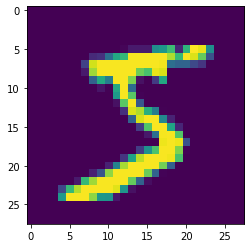

In [ ]:
plt.imshow(mnist_trainset.data[0,:,:])

#### How is this tensor normalised? Is it [-1, 1], or [0, 1], or [0, 255]?

In [ ]:
print(mnist_trainset.data[0,:,:].max().max(), mnist_trainset.data[0,:,:].min().min())

tensor(255, dtype=torch.uint8) tensor(0, dtype=torch.uint8)


#### We've found the data. We now need to find the labels. We'll also explore what we can find inside this before going into building the iterator

In [ ]:
mnist_trainset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
mnist_trainset.train_data.shape

/home/juan/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [ ]:
mnist_trainset.test_data.shape

/home/juan/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


torch.Size([60000, 28, 28])

#### It seems that both train data and test data end up in the same place: data

In [ ]:
mnist_trainset.train_labels

/home/juan/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
mnist_trainset.targets[0]

tensor(5)

In [ ]:
mnist_trainset.targets.shape

torch.Size([60000])

#### OK. So it seems that the targets are stored in the 'targets' variable
## Now it's time to build the iterator
#### I will have to check how we've built it in class. But I just want to look at one or two lines of code

I just checked and it uses the **torch.utils.data.DataLoader** to do this.
What are the advantages of using this as opposed to accessing the data directly?
Does it have anything to do with knowing what device to use?

In [ ]:
batch_size = 4

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=None)
train_iter = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)

test_data = datasets.MNIST(root='./data', train=False, download=True, transform=None)
test_iter = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=2)

#### Let's explore this. I want to be able to plot, visualize and have the visualization tools under control. This is teh opportunity to fully learn about subplots, titles, etc...